In [2]:
### Data Collection
import pandas_datareader as pdr
key=""

In [3]:
import json
import csv

def json_to_csv(input_file, output_file):
    with open(input_file, 'r') as json_file:
        data = json.load(json_file)

    # Extract keys (dates)
    dates = sorted(data.keys())
    keys = data[dates[0]].keys()

    with open(output_file, 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=['Date'] + list(keys))
        writer.writeheader()

        for date in dates:
            row = {'Date': date}
            row.update(data[date])
            writer.writerow(row)

# Example usage:
json_to_csv('sample.json', 'output.csv')


In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('output.csv')

In [6]:
df.head()

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
0,2005-01-03,354.4090,371.0715,354.4090,370.1173,79.2399,11842921,0.0,1.0
1,2005-01-04,364.5972,371.3782,360.8491,361.7351,77.4453,10059943,0.0,1.0
2,2005-01-05,358.1230,363.9158,351.8194,361.1217,77.3140,16954266,0.0,1.0
3,2005-01-06,357.7824,365.6195,356.1468,358.4297,76.7377,13446517,0.0,1.0
4,2005-01-07,359.8269,373.1159,359.5202,368.5840,78.9116,16969845,0.0,1.0


In [7]:
df.tail()

,Date,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
4429,2022-12-26,2291.5385,2317.3829,2273.5340,2301.3840,2293.2827,95382,0.0,1.0
4430,2022-12-27,2305.4863,2323.5363,2292.1310,2320.1178,2311.9506,184837,0.0,1.0
4431,2022-12-28,2311.7764,2324.5391,2298.4212,2319.5708,2311.4055,168925,0.0,1.0
4432,2022-12-29,2308.2667,2323.7187,2303.2072,2317.8387,2309.6795,157229,0.0,1.0
4433,2022-12-30,2321.8954,2349.1529,2317.8387,2322.9894,2314.8121,77470,0.0,1.0


In [8]:
df1=df.reset_index()['close']

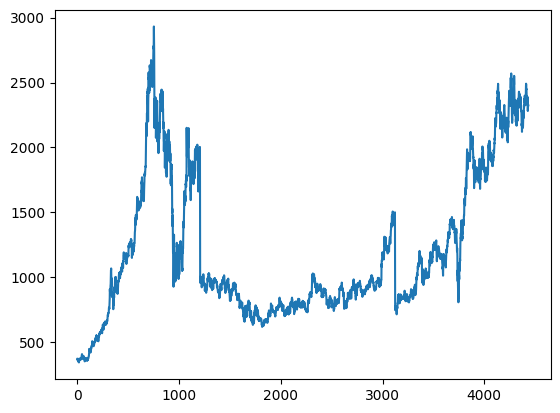

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.01097079]
 [0.00773485]
 [0.00749804]
 ...
 [0.76355602]
 [0.76288734]
 [0.76487576]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(2882, 1552)

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(2781, 100)
(2781,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(1451, 100)
(1451,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
print(X_train[0])

[[0.01097079]
 [0.00773485]
 [0.00749804]
 [0.0064588 ]
 [0.01037886]
 [0.00844514]
 [0.00636676]
 [0.00444621]
 [0.00494606]
 [0.00314391]
 [0.00264405]
 [0.00259143]
 [0.00309129]
 [0.00257827]
 [0.00134175]
 [0.        ]
 [0.00126284]
 [0.00561694]
 [0.00822154]
 [0.0108393 ]
 [0.00853729]
 [0.01044464]
 [0.00919496]
 [0.00756383]
 [0.00840572]
 [0.00940544]
 [0.01078668]
 [0.01240465]
 [0.01098395]
 [0.009879  ]
 [0.00877397]
 [0.00886612]
 [0.0086951 ]
 [0.00852409]
 [0.01006311]
 [0.01227309]
 [0.0119048 ]
 [0.01012889]
 [0.01437783]
 [0.01194421]
 [0.01247044]
 [0.01500925]
 [0.01854778]
 [0.02213893]
 [0.02344122]
 [0.02262566]
 [0.02434887]
 [0.0226914 ]
 [0.02027099]
 [0.01819257]
 [0.01898185]
 [0.01593002]
 [0.018482  ]
 [0.01529867]
 [0.01132599]
 [0.0136148 ]
 [0.01544332]
 [0.01727181]
 [0.01250989]
 [0.0109445 ]
 [0.01172061]
 [0.0165746 ]
 [0.01665355]
 [0.01427259]
 [0.01825836]
 [0.01685082]
 [0.01466721]
 [0.01204945]
 [0.01240465]
 [0.01158905]
 [0.00744542]
 [0.00

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.0250 - val_loss: 0.0025
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - loss: 9.3518e-04 - val_loss: 9.7380e-04
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 8.5835e-04 - val_loss: 0.0017
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - loss: 7.6844e-04 - val_loss: 9.3885e-04
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - loss: 6.8597e-04 - val_loss: 7.4778e-04
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - loss: 6.7261e-04 - val_loss: 0.0012
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - loss: 7.2819e-04 - val_loss: 6.8796e-04


44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 2.1837e-04 - val_loss: 3.0718e-04
Epoch 65/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - loss: 3.3908e-04 - val_loss: 4.0074e-04
Epoch 66/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 2.3060e-04 - val_loss: 2.4096e-04
Epoch 67/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - loss: 2.9626e-04 - val_loss: 1.9738e-04
Epoch 68/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 1.4544e-04 - val_loss: 7.9771e-04
Epoch 69/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 3.7956e-04 - val_loss: 2.0024e-04
Epoch 70/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - loss: 3.9340e-04 - val_loss: 2.1716e-04
Epoch 71/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - loss: 3.4990e-04 - val_loss: 2.0057e-04
Epoch 72/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - loss: 2.0112e-04 - val_loss: 2.2426e-04
Epoch 73/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - loss: 1.5910e-04 - val_loss: 3.9696e-04
Epoch 74/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step

In [26]:
import tensorflow as tf

In [27]:
tf.__version__


'2.16.1'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [29]:
model.save("NeuroTrader.h5")

In [30]:
model.save("NeuroTrader.keras")

In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1174.1651522694656

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1631.2914681737907

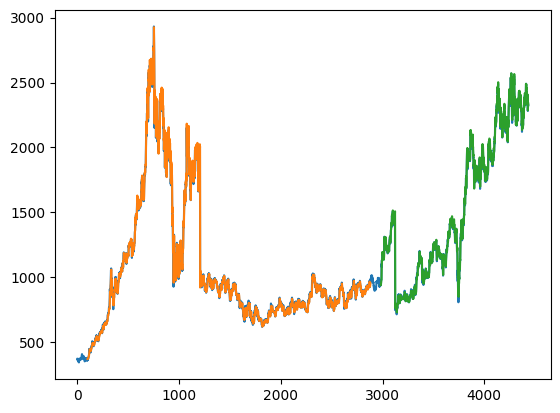

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)


1552

In [80]:
x_input=test_data[:].reshape(1,-1)
x_input.shape

(1, 1552)

In [81]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [82]:
temp_input


[0.2466408592686102,
 0.2489987713979908,
 0.2460953329530747,
 0.24512754587472504,
 0.25086400736582126,
 0.25624850767803864,
 0.2585008739191824,
 0.2588880041924958,
 0.2515854563633959,
 0.24554984524247273,
 0.24891079075450442,
 0.25183179444417103,
 0.2535211077299624,
 0.25144470277579123,
 0.2591167770285203,
 0.2587120429055231,
 0.2537850110554878,
 0.24032370236754405,
 0.24753826955315753,
 0.2411859435576569,
 0.24792536122153727,
 0.2506000268304288,
 0.2511631569956483,
 0.24268161449692463,
 0.2423825034720312,
 0.24109792430923707,
 0.23907433090411787,
 0.2370859451983666,
 0.23884559667302682,
 0.23701552979963073,
 0.22848125296172225,
 0.2289739677282058,
 0.22205855017241924,
 0.22070359421582278,
 0.22102034769533366,
 0.2219705309239994,
 0.223536617262003,
 0.22051002907916614,
 0.21565341262786672,
 0.21503750951852893,
 0.2134362154811574,
 0.21561820492849884,
 0.21681476484287307,
 0.22040448319092934,
 0.22256883018365328,
 0.21672678419938676,
 0.21778

In [84]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=1551
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.24899877 0.24609533 0.24512755 ... 0.76355602 0.76288734 0.76487576]
0 day output [[0.7702617]]
1 day input [0.24609533 0.24512755 0.25086401 ... 0.76288734 0.76487576 0.7702617 ]
1 day output [[0.7752246]]
2 day input [0.24512755 0.25086401 0.25624851 ... 0.76487576 0.7702617  0.77522463]
2 day output [[0.7794896]]
3 day input [0.25086401 0.25624851 0.25850087 ... 0.7702617  0.77522463 0.77948958]
3 day output [[0.7830695]]
4 day input [0.25624851 0.25850087 0.258888   ... 0.77522463 0.77948958 0.78306949]
4 day output [[0.7862773]]
5 day input [0.25850087 0.258888   0.25158546 ... 0.77948958 0.78306949 0.78627729]
5 day output [[0.78930074]]
6 day input [0.258888   0.25158546 0.24554985 ... 0.78306949 0.78627729 0.78930074]
6 day output [[0.7922914]]
7 day input [0.25158546 0.24554985 0.24891079 ... 0.78627729 0.78930074 0.7922914 ]
7 day output [[0.79534143]]
8 day input [0.24554985 0.24891079 0.25183179 ... 0.78930074 0.7922914  0.79534143]
8 day output [[0.7984802]]

In [85]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [86]:
import matplotlib.pyplot as plt


In [87]:
len(df1)


4434

In [88]:
scaler.inverse_transform(lst_output)

array([[2336.94083038],
       [2349.79649594],
       [2360.84417913],
       [2370.11738399],
       [2378.42669184],
       [2386.2584515 ],
       [2394.0052931 ],
       [2401.90591357],
       [2410.03643034],
       [2418.36056025],
       [2426.78659181],
       [2435.21710088],
       [2443.57519801],
       [2451.8130203 ],
       [2459.91342977],
       [2467.87750717],
       [2475.71590587],
       [2483.44097758],
       [2491.06044212],
       [2498.57630664],
       [2505.98532882],
       [2513.28009764],
       [2520.45011413],
       [2527.48734968],
       [2534.38099653],
       [2541.12333487],
       [2547.70803443],
       [2554.13030894],
       [2560.38583529],
       [2566.47198874]])

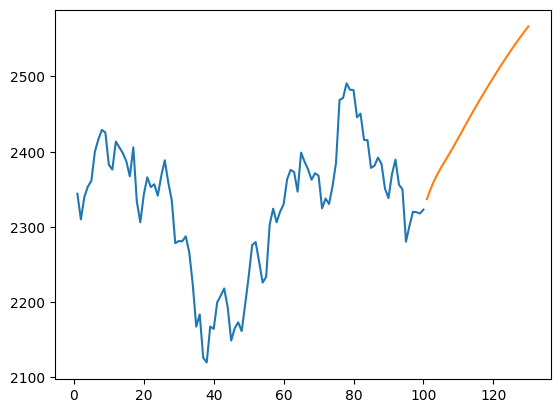

In [91]:
plt.plot(day_new,scaler.inverse_transform(df1[4334:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

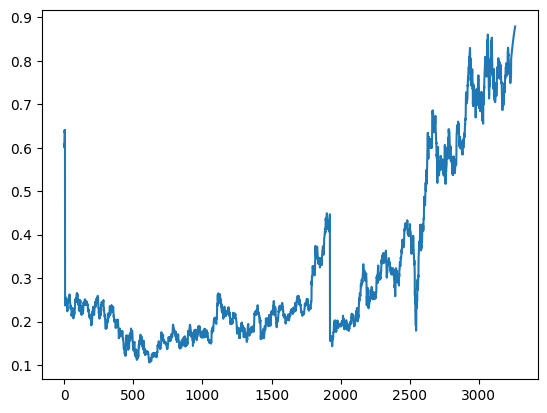

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [54]:
df3=scaler.inverse_transform(df3).tolist()

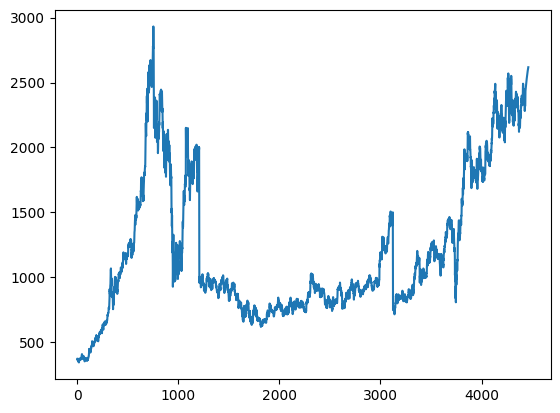

In [55]:
plt.plot(df3)

[[0.24664086]
 [0.24899877]
 [0.24609533]
 [0.24512755]
 [0.25086401]
 [0.25624851]
 [0.25850087]
 [0.258888  ]
 [0.25158546]
 [0.24554985]]


In [69]:
x_input=test_data[0:10].reshape(1,-1)
x_input = x_input.reshape((1, 10, 1))
    #print(x_input)
yhat = model.predict(x_input, verbose=0)

In [70]:
yhat

array([[0.24243245]], dtype=float32)